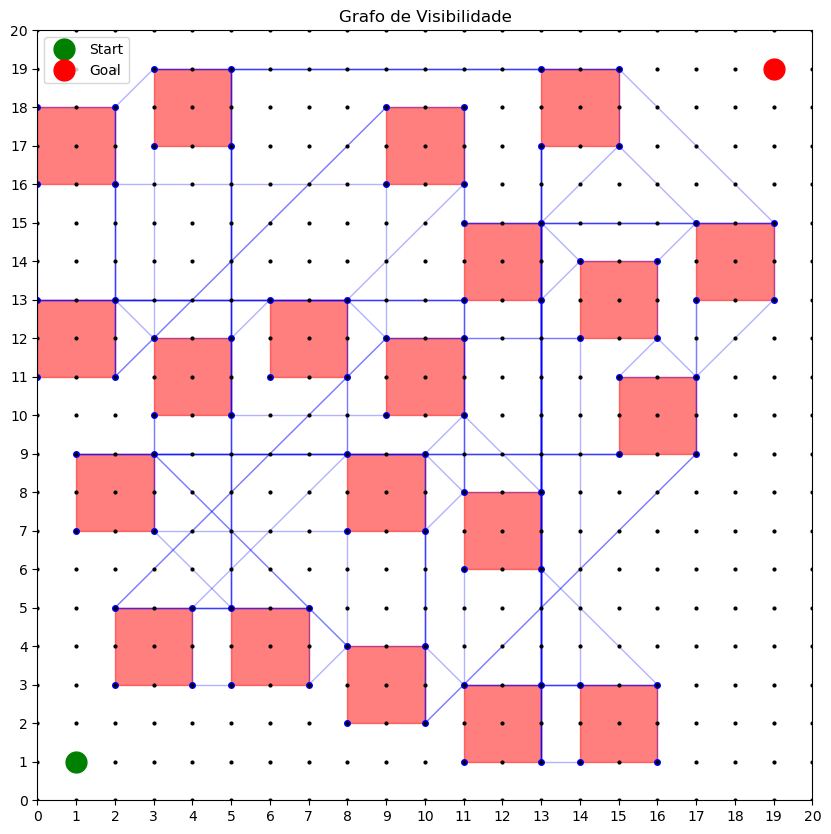

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

class Ambiente:
    def __init__(self, start, goal, num_obstaculos=10, tamanho_obstaculo=5):
        self.start = np.array([int(start[0]), int(start[1])])
        self.goal = np.array([int(goal[0]), int(goal[1])])
        self.tamanho_obstaculo = tamanho_obstaculo
        self.obstaculos = self._criar_obstaculos(num_obstaculos)
        self.vertices = self._extrair_vertices()
        
    def _criar_obstaculos(self, num_obstaculos):
        obstaculos = []
        margem = 1
        
        for _ in range(num_obstaculos):
            while True:
                x = int(np.random.uniform(0, 20 - self.tamanho_obstaculo))
                y = int(np.random.uniform(0, 20 - self.tamanho_obstaculo))
                novo = (x, y)
                
                if self._colide_com_ponto(novo, self.start) or self._colide_com_ponto(novo, self.goal):
                    continue
                    
                colisao = False
                for obs in obstaculos:
                    if self._obstaculos_colidem(novo, obs, margem):
                        colisao = True
                        break
                
                if not colisao:
                    obstaculos.append(novo)
                    break
                    
        return obstaculos
    
    def _colide_com_ponto(self, obstaculo, ponto, margem=1):
        x, y = obstaculo
        px, py = ponto
        return (x - margem < px < x + self.tamanho_obstaculo + margem and
                y - margem < py < y + self.tamanho_obstaculo + margem)
    
    def _obstaculos_colidem(self, obs1, obs2, margem):
        x1, y1 = obs1
        x2, y2 = obs2
        return (x1 < x2 + self.tamanho_obstaculo + margem and
                x1 + self.tamanho_obstaculo + margem > x2 and
                y1 < y2 + self.tamanho_obstaculo + margem and
                y1 + self.tamanho_obstaculo + margem > y2)
    
    def _extrair_vertices(self):
        vertices = []
        for x, y in self.obstaculos:
            vertices.extend([
                (x, y),  # inferior esquerdo
                (x + self.tamanho_obstaculo, y),  # inferior direito
                (x + self.tamanho_obstaculo, y + self.tamanho_obstaculo),  # superior direito
                (x, y + self.tamanho_obstaculo)  # superior esquerdo
            ])
        return [(int(v[0]), int(v[1])) for v in vertices]
    
    def _linha_livre(self, v1, v2):
        """Verifica se a linha entre v1 e v2 está livre de obstáculos"""
        x1, y1 = v1
        x2, y2 = v2
        
        # Verifica se está na mesma linha horizontal
        if y1 == y2:
            x_min, x_max = min(x1, x2), max(x1, x2)
            for obs_x, obs_y in self.obstaculos:
                if (obs_y <= y1 < obs_y + self.tamanho_obstaculo and
                    obs_x < x_max and obs_x + self.tamanho_obstaculo > x_min):
                    return False
            return True
        
        # Verifica se está na mesma linha vertical
        elif x1 == x2:
            y_min, y_max = min(y1, y2), max(y1, y2)
            for obs_x, obs_y in self.obstaculos:
                if (obs_x <= x1 < obs_x + self.tamanho_obstaculo and
                    obs_y < y_max and obs_y + self.tamanho_obstaculo > y_min):
                    return False
            return True
        
        # Verifica diagonal (inclinação 1 ou -1)
        elif abs(x1 - x2) == abs(y1 - y2):
            # Ordena os pontos para percorrer sempre da esquerda para a direita
            if x1 > x2:
                x1, x2 = x2, x1
                y1, y2 = y2, y1
                
            passo_x = 1
            passo_y = 1 if y2 > y1 else -1
            
            # Verifica cada ponto ao longo da diagonal
            x = x1
            y = y1
            while x <= x2:
                # Verifica se o ponto (x,y) está dentro de algum obstáculo
                for obs_x, obs_y in self.obstaculos:
                    if (obs_x <= x < obs_x + self.tamanho_obstaculo and
                        obs_y <= y < obs_y + self.tamanho_obstaculo):
                        return False
                
                x += passo_x
                y += passo_y
                
            return True
        
        return False
    
    def plotar_grafo_visibilidade(self):
        plt.figure(figsize=(10, 10))
        ax = plt.gca()
        ax.set_xlim(0, 20)
        ax.set_ylim(0, 20)
        
        # Desenha obstáculos
        for x, y in self.obstaculos:
            ax.add_patch(Rectangle(
                (x, y), self.tamanho_obstaculo, self.tamanho_obstaculo,
                color='red', alpha=0.5
            ))
        
        # Marca vértices
        for v in self.vertices:
            ax.plot(v[0], v[1], 'bo', markersize=4)
        
        # Desenha conexões (horizontais, verticais e diagonais)
        for i, v1 in enumerate(self.vertices):
            for j, v2 in enumerate(self.vertices[i+1:], i+1):
                if self._linha_livre(v1, v2):
                    ax.plot([v1[0], v2[0]], [v1[1], v2[1]], 'b-', alpha=0.3, linewidth=1)
        
        # Pontos pretos para grade
        for x in range(21):
            for y in range(21):
                ax.plot(x, y, 'ko', markersize=2)
        
        # Marca start e goal
        ax.plot(self.start[0], self.start[1], 'go', markersize=15, label='Start')
        ax.plot(self.goal[0], self.goal[1], 'ro', markersize=15, label='Goal')
        
        plt.legend()
        plt.title("Grafo de Visibilidade")
        plt.xticks(range(0, 21, 1))
        plt.yticks(range(0, 21, 1))
        plt.show()

# Exemplo de uso
ambiente = Ambiente(start=(1, 1), goal=(19, 19), num_obstaculos=20, tamanho_obstaculo=2)
ambiente.plotar_grafo_visibilidade()